<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=imagens/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Governo do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="imagens/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

# Aprendizagem de Máquina e Mineração de Dados 
### Trabalho Prático II, versão 1.0
#### Classificação de desenhos simples (Gatos, Leões e Tigres)

Professor _Marco Cristo_ 

**Alunos** (até 2):

_Mário Damhur Moraes Müller_

# Observações !!!

Executar as funções para realizar o pré-processamento dos dados para cada rede (Eu só normalizo e dou o reshape dependendo da rede):

1. **preprocessing_fnn**
2. **preprocessing_cnn**
3. **preprocessing_resnet**

Exemplo:

**test_X = preprocessing_resnet(test_X)**

Para **importar** os modelos utilizar **from tensorflow.keras.models import load_model** e então **model = load_model(nome_do_modelo)** do tf2, ao invés do keras (Deu erro ao tentar do keras, acredito que seja por que eu estou usando o keras do tf2).

In [1]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
import sys
%matplotlib inline

np.random.seed(1)
tf.random.set_seed(1)

Using TensorFlow backend.


In [2]:
print('Python', sys.version)
print('--------')
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Keras:', keras.__version__)
print('Tensorflow:', tf.__version__)
print('Keras (TF):', tf.keras.__version__)

Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
--------
Pandas: 0.24.2
Numpy: 1.16.4
Keras: 2.2.4
Tensorflow: 2.0.0-beta1
Keras (TF): 2.2.4-tf


In [3]:
animals = np.load("catliontiger_tr.npz")
animals['data'].shape

(120000, 785)

In [4]:
X = animals['data'][:,:-1].astype('float32')
y = pd.get_dummies(animals['data'][:,-1]).values

X.dtype, y.dtype

(dtype('float32'), dtype('uint8'))

In [5]:
from sklearn.model_selection import train_test_split

X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=3000, shuffle=True, 
                                                        random_state=42, stratify=y)
X_train_o, X_val_o, y_train, y_val = train_test_split(X_train_o, y_train, test_size=6000, shuffle=True, 
                                                        random_state=42, stratify=y_train)

# FNN

In [6]:
def preprocessing_fnn(data):
    x = data / 255.0
    return x

X_train = preprocessing_fnn(X_train_o)
X_test = preprocessing_fnn(X_test_o)
X_val = preprocessing_fnn(X_val_o)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (111000, 784)
y_train shape: (111000, 3)
X_test shape: (3000, 784)
y_test shape: (3000, 3)
X_val shape: (6000, 784)
y_val shape: (6000, 3)


In [7]:
def model_fnn():
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False, input_shape=(784,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(lr=0.001), metrics=["accuracy"])
    
    return model

In [8]:
model_fnn_name = 'fnn.h5'
model_fnn = model_fnn()

checkpoint = tf.keras.callbacks.ModelCheckpoint(model_fnn_name, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5, restore_best_weights=True)

history = model_fnn.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stopping])

W0711 12:27:14.332505 140088239945536 deprecation.py:323] From /home/damhur/.tensorflow2/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 111000 samples, validate on 6000 samples
Epoch 1/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.6997 - accuracy: 0.7253
Epoch 00001: val_loss improved from inf to 0.57595, saving model to fnn.h5
111000/111000 [==============================] - 3s 24us/sample - loss: 0.6993 - accuracy: 0.7254 - val_loss: 0.5760 - val_accuracy: 0.7662
Epoch 2/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7845
Epoch 00002: val_loss improved from 0.57595 to 0.48343, saving model to fnn.h5
111000/111000 [==============================] - 1s 10us/sample - loss: 0.5557 - accuracy: 0.7845 - val_loss: 0.4834 - val_accuracy: 0.8115
Epoch 3/20
106496/111000 [===========================>..] - ETA: 0s - loss: 0.5169 - accuracy: 0.7996
Epoch 00003: val_loss improved from 0.48343 to 0.45058, saving model to fnn.h5
111000/111000 [==============================] - 1s 10us/sample - loss: 0.5156 - accuracy: 0.8002 - val_loss: 0.4506 - val_accuracy

In [9]:
model_fnn.evaluate(X_test, y_test)

3000/3000 [==============================] - 0s 71us/sample - loss: 0.3835 - accuracy: 0.8480


[0.3834942475954692, 0.848]

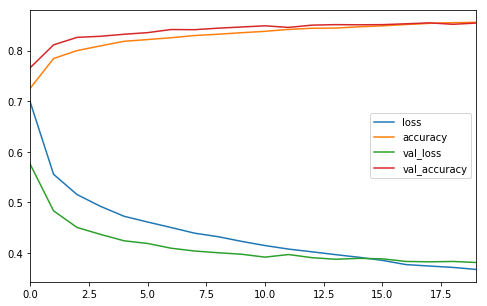

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [11]:
# Testing load model

load = load_model(model_fnn_name)
load.evaluate(X_test, y_test)

3000/3000 [==============================] - 0s 67us/sample - loss: 0.3835 - accuracy: 0.8480


[0.3834942475954692, 0.848]

# CNN

In [12]:
def preprocessing_cnn(data):
    x = data.reshape(-1, 28, 28, 1)
    x = x / 255.0
    return x 

X_train = preprocessing_cnn(X_train_o)
X_test = preprocessing_cnn(X_test_o)
X_val = preprocessing_cnn(X_val_o)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (111000, 28, 28, 1)
y_train shape: (111000, 3)
X_test shape: (3000, 28, 28, 1)
y_test shape: (3000, 3)
X_val shape: (6000, 28, 28, 1)
y_val shape: (6000, 3)


In [13]:
def model_cnn():    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28,28,1), use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding = 'same'))
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding = 'same'))
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(256, use_bias=False, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.5))
       
    model.add(tf.keras.layers.Dense(64, use_bias=False, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    
    
    model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(lr=0.001), metrics=["accuracy"])
    
    return model

In [14]:
model_cnn_name = 'cnn.h5'
model_cnn = model_cnn()

checkpoint = tf.keras.callbacks.ModelCheckpoint(model_cnn_name, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5, restore_best_weights=True)

history = model_cnn.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stopping])

Train on 111000 samples, validate on 6000 samples
Epoch 1/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.5237 - accuracy: 0.7934
Epoch 00001: val_loss improved from inf to 1.11822, saving model to cnn.h5
111000/111000 [==============================] - 23s 211us/sample - loss: 0.5232 - accuracy: 0.7936 - val_loss: 1.1182 - val_accuracy: 0.3507
Epoch 2/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.3867 - accuracy: 0.8535
Epoch 00002: val_loss improved from 1.11822 to 0.70353, saving model to cnn.h5
111000/111000 [==============================] - 19s 168us/sample - loss: 0.3867 - accuracy: 0.8536 - val_loss: 0.7035 - val_accuracy: 0.6573
Epoch 3/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.3544 - accuracy: 0.8663
Epoch 00003: val_loss improved from 0.70353 to 0.34292, saving model to cnn.h5
111000/111000 [==============================] - 19s 168us/sample - loss: 0.3543 - accuracy: 0.8663 - val_loss: 0.3429 - val_ac

In [15]:
model_cnn.evaluate(X_test, y_test)

3000/3000 [==============================] - 1s 176us/sample - loss: 0.2548 - accuracy: 0.9027


[0.25480651028951007, 0.9026667]

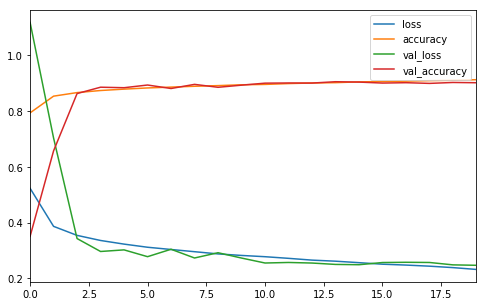

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [17]:
# Testing load model

load = load_model(model_cnn_name)
load.evaluate(X_test, y_test)

3000/3000 [==============================] - 0s 162us/sample - loss: 0.2548 - accuracy: 0.9027


[0.25480651028951007, 0.9026667]

# ResNet

In [18]:
def preprocessing_resnet(data):
    x = data.reshape(-1, 28, 28, 1)
    x = x / 255.0
    return x 

X_train = preprocessing_resnet(X_train_o)
X_test = preprocessing_resnet(X_test_o)
X_val = preprocessing_resnet(X_val_o)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (111000, 28, 28, 1)
y_train shape: (111000, 3)
X_test shape: (3000, 28, 28, 1)
y_test shape: (3000, 3)
X_val shape: (6000, 28, 28, 1)
y_val shape: (6000, 3)


In [19]:
def ResidualUnit_(filters, strides=1, activation="relu"):
    def block(x):
        skip = x
        
        if strides > 1:
            skip = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=strides, padding="SAME", use_bias=False)(skip)
            skip = tf.keras.layers.BatchNormalization()(skip)
        
        x = tf.keras.layers.Conv2D(filters, kernel_size=3, strides=strides, padding="SAME", use_bias=False)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.Conv2D(filters, kernel_size=3, strides=1, padding="SAME", use_bias=False)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        
        x = tf.keras.layers.add([skip, x])
        x = tf.keras.layers.ReLU()(x)
        
        return x
    return block

In [20]:
def model_resnet():
    img_input = tf.keras.layers.Input(shape = (28, 28, 1))

    x = ResidualUnit_(16, 1)(img_input)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    
    prev_filters = 16
    for filters in [16] + [32]*2 + [64]*2:
        strides = 1 if filters == prev_filters else 2
        x = ResidualUnit_(filters, strides=strides)(x)
        prev_filters = filters

    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.GlobalAvgPool2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    
    x = tf.keras.layers.Dense(64, use_bias=False, kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(0.7)(x)
    
    yhat = tf.keras.layers.Dense(3, activation='softmax')(x)

    model = tf.keras.models.Model(inputs = img_input, outputs = yhat)    
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(lr=0.001), metrics=["accuracy"])
   
    return model

In [21]:
model_resnet_name = 'resnet.h5'
model_resnet = model_resnet()

checkpoint = tf.keras.callbacks.ModelCheckpoint(model_resnet_name, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5, restore_best_weights=True)

history = model_resnet.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stopping])

W0711 12:34:16.448738 140088239945536 nn_ops.py:4220] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 111000 samples, validate on 6000 samples
Epoch 1/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.6128 - accuracy: 0.7723
Epoch 00001: val_loss improved from inf to 0.93923, saving model to resnet.h5
111000/111000 [==============================] - 18s 166us/sample - loss: 0.6122 - accuracy: 0.7725 - val_loss: 0.9392 - val_accuracy: 0.5538
Epoch 2/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.3884 - accuracy: 0.8599
Epoch 00002: val_loss improved from 0.93923 to 0.66722, saving model to resnet.h5
111000/111000 [==============================] - 13s 118us/sample - loss: 0.3884 - accuracy: 0.8599 - val_loss: 0.6672 - val_accuracy: 0.7543
Epoch 3/20
110592/111000 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.8756
Epoch 00003: val_loss improved from 0.66722 to 0.37286, saving model to resnet.h5
111000/111000 [==============================] - 13s 120us/sample - loss: 0.3506 - accuracy: 0.8755 - val_loss: 0.3729

In [27]:
model_resnet.evaluate(X_test, y_test)

3000/3000 [==============================] - 0s 91us/sample - loss: 0.3170 - accuracy: 0.8807


[0.31695725305875144, 0.8806667]

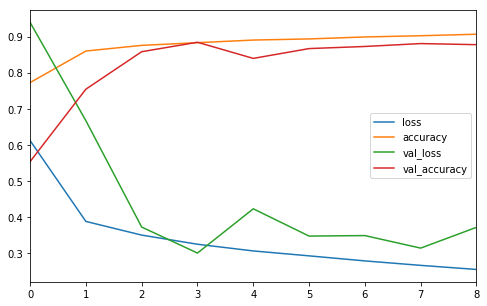

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [24]:
# Testing load model

load = load_model(model_resnet_name)
load.evaluate(X_test, y_test)

W0711 12:36:31.451584 140088239945536 nn_ops.py:4220] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


3000/3000 [==============================] - 1s 256us/sample - loss: 0.3170 - accuracy: 0.8807


[0.31695725305875144, 0.8806667]